# Data Processing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("D:/ExcelR Data Science/Assignments/MultiLinearRegression/50_Startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.shape

(50, 5)

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:

states=data.State.value_counts()

# Visualization

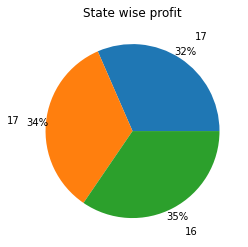

In [12]:
df = data.groupby(['State']).Profit.sum()
plt.pie(df, labels=states, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('State wise profit')
plt.show()

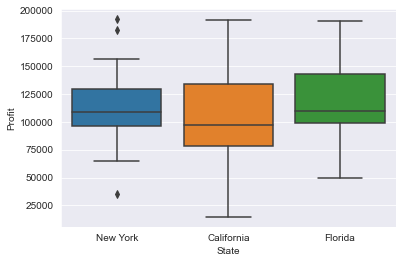

In [13]:
sns.set_style(style='darkgrid')
sns.boxplot(x = 'State', y = 'Profit', data = data)
plt.show()

In [14]:
data=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [27]:
# Assigning Values for Category Variable

from sklearn.preprocessing import LabelEncoder
  

label_encoder =LabelEncoder()
data['State']= label_encoder.fit_transform(data['State'])


In [29]:
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


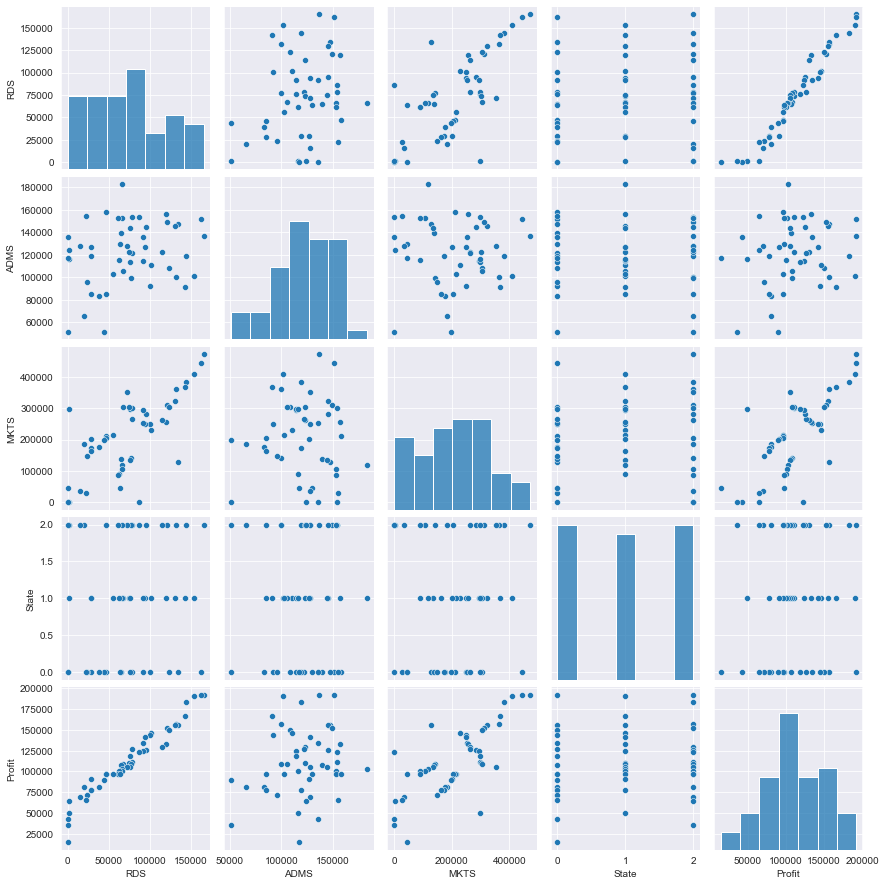

In [30]:
sns.pairplot(data=data)

In [ ]:
#Calculating  Correlation and VIF

In [31]:

data.corr()

,RDS,ADMS,MKTS,State,Profit
RDS,1.000000,0.241955,0.724248,0.104685,0.972900
ADMS,0.241955,1.000000,-0.032154,0.011847,0.200717
MKTS,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=data.columns
vif["vif_Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif

,features,vif_Factor
0,RDS,30.662561
1,ADMS,13.560873
2,MKTS,9.847180
3,State,2.444870
4,Profit,81.707826


In [34]:
x=data.iloc[:,0:4]

y=data['Profit']

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=regressor.predict(x_test)
y_pred

array([126620.49493921,  85683.54596711,  98984.61503293,  45931.25925851,
       128475.2702596 ,  51982.19430756, 108543.94735642, 100621.09758694,
        97715.38523816, 112397.51790315, 128600.0448138 , 174434.12518968,
        93656.90339019])

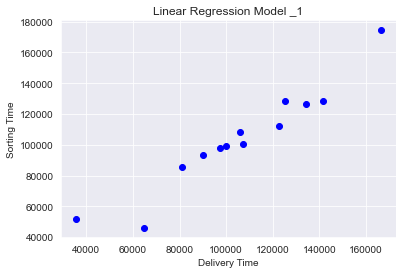

In [37]:
plt.title("Linear Regression Model _1")

plt.xlabel("Delivery Time")

plt.ylabel("Sorting Time")

plt.scatter(y_test, y_pred, color ='b')


plt.show()

<AxesSubplot:xlabel='Profit'>

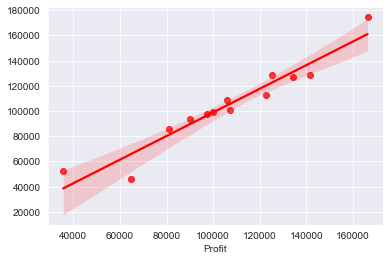

In [38]:
sns.regplot(x=y_test,y=y_pred,color='red')

In [39]:
testing_data_model_score = regressor.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

Model Score/Performance on Testing data 0.9190953762348166


In [40]:

training_data_model_score = regressor.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Training data 0.9544070449918146


In [41]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
13,126620.494939,134307.35
39,85683.545967,81005.76
30,98984.615033,99937.59
45,45931.259259,64926.08
17,128475.270260,125370.37
48,51982.194308,35673.41
26,108543.947356,105733.54
25,100621.097587,107404.34
32,97715.385238,97427.84
19,112397.517903,122776.86


In [42]:

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

print("R2_score:",r2_score(y_pred,y_test)*100)
print("Mean_Squared_Errr:",mean_squared_error(y_pred,y_test)*100)
print("Mean_Absolute_Error:",mean_absolute_error(y_pred,y_test)*100)
print("Root__Mean_Squared_Error:",np.sqrt(mean_squared_error(y_pred,y_test)))

R2_score: 91.54163319484478
Mean_Squared_Errr: 8695319130.02881
Mean_Absolute_Error: 745585.2474936969
Root__Mean_Squared_Error: 9324.869505804792


C:\Users\anilr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


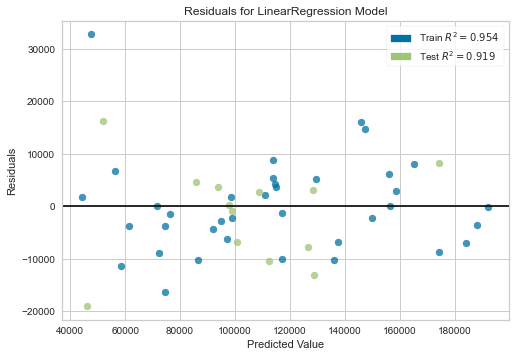

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor,hist=False)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

C:\Users\anilr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


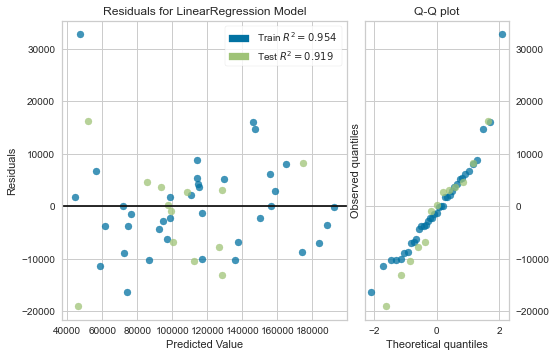

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor,hist=False,qqplot=True)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 